In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start, end):
    """
    Find the shortest path between `start` and `end` nodes in a weighted graph using Dijkstra's algorithm.
    :param graph: dictionary representing the graph, where each key is a node and the value is a list of tuples representing the connected nodes and their weights
    :param start: the starting node
    :param end: the destination node
    :return: a tuple of two items: the shortest distance between `start` and `end`, and the path between them
    """
    # create a dictionary to store the distances to all nodes and initialize with infinite distance to all nodes
    distances = {node: float('inf') for node in graph}
    # set the distance to the starting node to 0
    distances[start] = 0
    # create a dictionary to store the path to all nodes and initialize with empty path to all nodes
    paths = {node: [] for node in graph}
    # create a heap to store the nodes to be visited, where the key is the distance to the node
    heap = [(0, start)]
    
    while heap:
        # get the node with the smallest distance from the heap
        current_distance, current_node = heapq.heappop(heap)
        
        # check if the current node is the destination node
        if current_node == end:
            # return the shortest distance and the path to the destination node
            return current_distance, paths[end] + [end]
        
        # check if the current node has already been visited
        if current_distance > distances[current_node]:
            continue
        
        # visit the neighbors of the current node
        for neighbor, weight in graph[current_node]:
            # calculate the distance to the neighbor node
            distance = current_distance + weight
            # check if the new distance is shorter than the current distance to the neighbor node
            if distance < distances[neighbor]:
                # update the distance and path to the neighbor node
                distances[neighbor] = distance
                paths[neighbor] = paths[current_node] + [current_node]
                # add the neighbor node to the heap
                heapq.heappush(heap, (distance, neighbor))
    
    # if the destination node is not reachable from the starting node, return None
    return None





### Simple Graph

Shortest distance from A to F: 10
Shortest path: A -> C -> D -> F


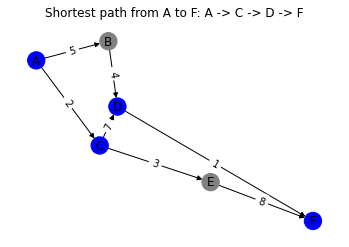

In [14]:
# example usage
graph = {
    'A': [('B', 5), ('C', 2)],
    'B': [('D', 4)],
    'C': [('D', 7), ('E', 3)],
    'D': [('F', 1)],
    'E': [('F', 8)],
    'F': []
}

start = 'A'
end = 'F'

distance, path = dijkstra(graph, start, end)

# print the shortest distance and path
print(f"Shortest distance from {start} to {end}: {distance}")
print(f"Shortest path: {' -> '.join(path)}")

G = nx.DiGraph()

for node, edges in graph.items():
    for edge, weight in edges:
        G.add_edge(node, edge, weight=weight)

# set the positions of the nodes
pos = nx.spring_layout(G)

# color the nodes in the shortest path
node_colors = ['blue' if node in path else 'gray' for node in G.nodes()]

# set the edge labels to the weights
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}

# draw the graph
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos)

plt.title(f"Shortest path from {start} to {end}: {' -> '.join(path)}")
plt.axis('off')
plt.show()

### Three atributes
1- distance
2- extreme weather
3- Gas emission

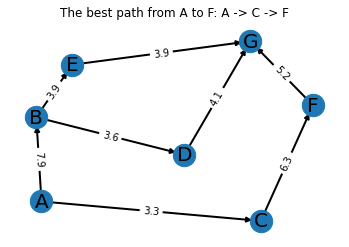

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# create a graph
graph = {
    'A': [('B', {'distance': 10, 'weather': 5, 'emission': 7}),
          ('C', {'distance': 3, 'weather': 2, 'emission': 6})],
    'B': [('D', {'distance': 2, 'weather': 6, 'emission': 4}),
          ('E', {'distance': 4, 'weather': 1, 'emission': 8})],
    'C': [('F', {'distance': 6, 'weather': 9, 'emission': 3})],
    'D': [('G', {'distance': 5, 'weather': 4, 'emission': 2})],
    'E': [('G', {'distance': 4, 'weather': 3, 'emission': 5})],
    'F': [('G', {'distance': 7, 'weather': 5, 'emission': 1})]
}

# set default weights for the criteria
distance_weight = 0.5
weather_weight = 0.3
emission_weight = 0.2

# get user input for the weights
dist_weight = float(input("Enter weight for distance (default 0.5): ") or distance_weight)
weather_weight = float(input("Enter weight for extreme weather (default 0.3): ") or weather_weight)
emission_weight = float(input("Enter weight for gas emission (default 0.2): ") or emission_weight)

# create a weighted graph based on the criteria weights
weighted_graph = nx.DiGraph()
for node, edges in graph.items():
    for edge in edges:
        # get the edge attributes
        distance = edge[1]['distance']
        weather = edge[1]['weather']
        emission = edge[1]['emission']
        # calculate the weighted sum of the criteria
        weight = round(dist_weight*distance + weather_weight*weather + emission_weight*emission,3)
        weighted_graph.add_edge(node, edge[0], weight=weight)

# find the shortest path using Dijkstra's algorithm
start = input("Enter the starting node: ")
end = input("Enter the ending node: ")
shortest_path = nx.shortest_path(weighted_graph, source=start, target=end, weight='weight')

# visualize the graph and shortest path
pos = nx.spring_layout(weighted_graph)
nx.draw_networkx_nodes(weighted_graph, pos, node_size=500)
nx.draw_networkx_labels(weighted_graph, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edges(weighted_graph, pos, width=2)
edge_labels = nx.get_edge_attributes(weighted_graph,'weight')
nx.draw_networkx_edge_labels(weighted_graph, pos, edge_labels=edge_labels, font_size=10)

plt.title(f"The best path from {start} to {end}: {' -> '.join(shortest_path)}")
plt.axis('off')
plt.show()


### Get calgary data

{'n': 34766, 'm': 82012, 'k_avg': 4.71794281769545, 'edge_length_total': 11310996.955000184, 'edge_length_avg': 137.91880401648766, 'streets_per_node_avg': 2.972300523499971, 'streets_per_node_counts': {0: 0, 1: 4596, 2: 157, 3: 22058, 4: 7532, 5: 415, 6: 8}, 'streets_per_node_proportions': {0: 0.0, 1: 0.13219812460449865, 2: 0.004515906345279871, 3: 0.6344704596444802, 4: 0.21664844963470056, 5: 0.011936949893574182, 6: 0.00023010987746649024}, 'intersection_count': 30170, 'street_length_total': 7059634.624999982, 'street_segment_count': 51665, 'street_length_avg': 136.64249733862349, 'circuity_avg': 1.1398514115560443, 'self_loop_proportion': 0.012310074518532856}


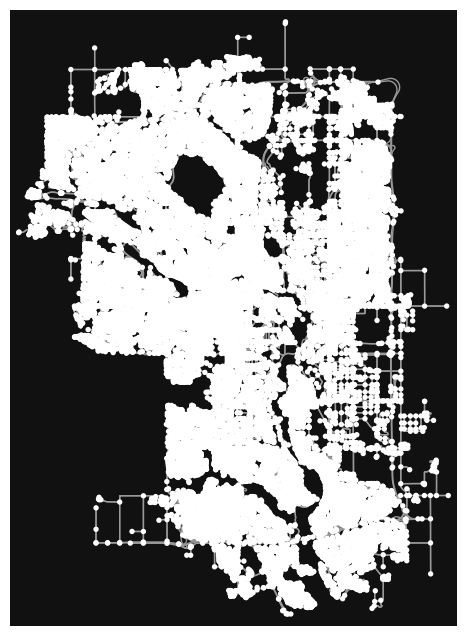

In [4]:
import osmnx as ox

# Define the location as Calgary, Canada
location = "Calgary, Canada"

# Download the street network for the location
#graph = ox.graph_from_place(location, network_type="drive")

#graph = ox.graph_from_place(location, network_type="drive", which_result=1, buffer_dist=5000, simplify=False, retain_all=True, truncate_by_edge=True, clean_periphery=True, custom_filter='["area"!~"Railway"]',  proj_crs="EPSG:32612")

graph = ox.graph.graph_from_place(location, network_type="drive", simplify=True)

# Print some summary statistics about the graph
print(ox.basic_stats(graph))

# Plot the graph
fig, ax = ox.plot_graph(graph)


In [15]:
import geopandas as gpd
# Convert the graph to GeoDataFrame with geometry
nodes_gdf, edges_gdf = ox.graph_to_gdfs(graph)


In [30]:
ox.distance.nearest_nodes(graph, 51.090632, -114.153066, return_dist=True)

(10292427986, 13037957.439797867)

In [27]:
orig  = (51.090632, -114.153066)

dest = (51.088788, -114.113264)

k =1
paths = ox.distance.k_shortest_paths(graph, orig, dest, k, weight='length')

In [34]:
orig = ox.distance.nearest_nodes(graph, 51.090632, -114.153066, return_dist=False)
dest = ox.distance.nearest_nodes(graph, 51.010118, -113.990698, return_dist=False)
ox.shortest_path(graph, orig, dest, weight='length')

[10292427986]

In [36]:
import osmnx as ox

# Define the location as Calgary, Canada
location = "Calgary, Canada"

# Download the street network for the location
graph = ox.graph_from_place(location, network_type="drive")

# Save the graph as a GraphML file
ox.save_graphml(graph, filename='calgary_drive_network.graphml')

# Define the start and end points
start_point = (51.090632, -114.153066)
end_point = (51.144618, -114.104486)

# Find the nearest node in the graph to the start and end points
start_node = ox.distance.nearest_nodes(graph, start_point[1], start_point[0])
end_node = ox.distance.nearest_nodes(graph, end_point[1], end_point[0])

# Find the shortest path between the start and end nodes
shortest_path = ox.distance.shortest_path(graph, start_node, end_node, weight='length')

# Print the edges in the shortest path
print(shortest_path)


[5192190535, 672991372, 251503494, 28912478, 251504458, 29024622, 29024614, 29024624, 577474879, 170034141, 254039151, 513889079, 513880653, 29174994, 513892197, 170034147, 170034211, 623807994, 254039118, 83742210, 4600168001, 83742209, 856157271, 856157328, 2194922269, 1452767313, 4462008319, 4426108290, 2194922273, 302749007, 1452767392, 480021472, 617502334, 480021528, 617501795, 617501796, 168337173]


In [44]:
# find the edge between the two nodes
start_node = 5192190535
end_node = 672991372
out_edges = list(graph.out_edges(start_node, data=True))
edge = None
for u, v, d in out_edges:
    if v == end_node:
        edge = (u, v, d)
        break

In [45]:
edge

(5192190535,
 672991372,
 {'osmid': 4684553,
  'name': 'Valiant Drive NW',
  'highway': 'residential',
  'oneway': False,
  'reversed': True,
  'length': 102.85,
  'geometry': <LINESTRING (-114.153 51.091, -114.154 51.091, -114.154 51.091)>})

In [46]:
calgary_slope = ox.io.load_graphml('network.graphml')

In [50]:
calgary_slope

In [49]:
# Define the start and end points
start_point = (51.090632, -114.153066)
end_point = (51.144618, -114.104486)

# Find the nearest node in the graph to the start and end points
start_node = ox.distance.nearest_nodes(calgary_slope, start_point[1], start_point[0])
end_node = ox.distance.nearest_nodes(calgary_slope, end_point[1], end_point[0])

# Find the shortest path between the start and end nodes
shortest_path = ox.distance.shortest_path(calgary_slope, start_node, end_node, weight='grade_abs')

# Print the edges in the shortest path
print(shortest_path)

[5192190535, 672991372, 251503494, 28912478, 251504458, 251504517, 122962001, 2786961189, 122961916, 31363131, 29174983, 109682018, 513891635, 513892197, 170034147, 170034211, 623807994, 254039118, 83742210, 4600168001, 83742209, 856157271, 856157328, 2194922269, 1452766875, 2728667608, 29525006, 617907784, 617907783, 479718243, 479718246, 4065790587, 480012149, 4462008450, 302749007, 1452767392, 480021472, 617502334, 480021528, 617501795, 617501796, 168337173]


### Add trees

In [ ]:
import osmnx as ox
import geopandas as gpd
import numpy as np

# Define the location as Calgary, Canada
location = "Calgary, Canada"

# Download the street network for the location
graph = ox.graph_from_place(location, network_type="drive")

# Define the tree locations
tree_lats = [51.045556, 51.052778, 51.053611, 51.058333]
tree_longs = [-114.057222, -114.093056, -114.089722, -114.086944]

# Create a GeoDataFrame of the trees with their latitudes and longitudes
trees = gpd.GeoDataFrame(geometry=gpd.points_from_xy(tree_longs, tree_lats))

# Find the nearest nodes in the graph for each tree location
tree_nodes = ox.distance.nearest_nodes(graph, tree_longs, tree_lats, return_dist=False)

# Create a dictionary that maps each node to the number of trees near it
tree_counts = dict(zip(*np.unique(tree_nodes, return_counts=True)))

# Add the tree count as an attribute to each node in the graph
for node, count in tree_counts.items():
    graph.nodes[node]['tree_count'] = count

# Save the graph as a GraphML file
ox.save_graphml(graph, filename='calgary_drive_network_with_trees.graphml')


### add new columns by multiplication

In [ ]:
import osmnx as ox
import geopandas as gpd

# Define the location as Calgary, Canada
location = "Calgary, Canada"

# Download the street network for the location
graph = ox.graph_from_place(location, network_type="drive")

# Add a new attribute to each edge of the graph by multiplying two existing columns
for u, v, k, data in graph.edges(keys=True, data=True):
    data['new_attribute'] = data['length'] * data['grade_abs']

# Convert the graph to a GeoDataFrame
gdf_nodes, gdf_edges = ox.save_load.graph_to_gdfs(graph)

# Convert the GeoDataFrame back to a graph
graph_new = ox.save_load.gdfs_to_graph(gdf_nodes, gdf_edges)



In [13]:
slope_nodes_gdf, slope_edges_gdf = ox.graph_to_gdfs(calgary_slope)

In [14]:
slope_edges_gdf

osmid  oneway lanes  \
u          v          key                                                     
26611453   2411303853 0                             461113665    True     4   
           1438995963 0                             461113663    True     2   
26611466   256528570  0                              23271689   False     2   
           29488964   0                             203197136    True     1   
26611470   583004062  0                             203197133    True     1   
...                                                       ...     ...   ...   
9408176845 9408176844 0                            1020067773   False     2   
           673042774  0                            1020067772    True     2   
9418762360 2545258459 0                            1021212713   False     2   
           4767554174 0    [1021212714, 1021212715, 18764812]   False     4   
9418762363 4767554174 0                            1021212716    True     2   

                                             name       highway maxspeed  \
u          v          key                                                  
26611453   2411303853 0           Sarcee Trail SW         trunk       80   
           1438995963 0              Bow Trail SW     secondary      NaN   
26611466   256528570  0    Signal Hill Heights SW   residential      NaN   
           29488964   0          Sirocco Drive SW      tertiary      NaN   
26611470   583004062  0          Sirocco Drive SW      tertiary      NaN   
...                                           ...           ...      ...   
9408176845 9408176844 0               4 Avenue NE  unclassified      NaN   
           673042774  0           Barlow Trail NE     secondary       70   
9418762360 2545258459 0           Stoney Trail SE      motorway       60   
           4767554174 0           Stoney Trail SE      motorway       60   
9418762363 4767554174 0           Stoney Trail SE      motorway       60   

                            length  grade  grade_abs  speed_kph  travel_time  \
u          v          key                                                      
26611453   2411303853 0     12.776  0.078      0.078       80.0          0.6   
           1438995963 0     88.918 -0.022      0.022       59.2          5.4   
26611466   256528570  0     12.486  0.080      0.080       42.2          1.1   
           29488964   0    217.226  0.046      0.046       59.5         13.1   
26611470   583004062  0     16.390  0.061      0.061       59.5          1.0   
...                            ...    ...        ...        ...          ...   
9408176845 9408176844 0     13.804  0.000      0.000       46.3          1.1   
           673042774  0    332.577 -0.018      0.018       70.0         17.1   
9418762360 2545258459 0    245.695  0.016      0.016       60.0         14.7   
           4767554174 0    490.781  0.000      0.000       60.0         29.4   
9418762363 4767554174 0    310.235 -0.035      0.035       60.0         18.6   

                           bearing  \
u          v          key            
26611453   2411303853 0      360.0   
           1438995963 0      124.7   
26611466   256528570  0      146.6   
           29488964   0      265.7   
26611470   583004062  0      264.7   
...                            ...   
9408176845 9408176844 0       90.1   
           673042774  0      179.7   
9418762360 2545258459 0       84.8   
           4767554174 0      255.0   
9418762363 4767554174 0       73.9   

                                                                    geometry  \
u          v          key                                                      
26611453   2411303853 0    LINESTRING (-114.16412 51.05240, -114.16412 51...   
           1438995963 0    LINESTRING (-114.16412 51.05240, -114.16405 51...   
26611466   256528570  0    LINESTRING (-114.16730 51.03277, -114.16720 51...   
           29488964   0    LINESTRING (-114.16730 51.03277, -114.16741 51...   
26611470   583004062  0

In [13]:
import geopandas as gpd

#Slope layer
# Read the file
slope_data = gpd.read_file('network.gpkg')


In [15]:
# Convert the graph to GeoDataFrame with geometry
edges_gdf, nodes_gdf = ox.graph_to_gdfs(graph)

In [16]:
# Spatially join the slope data with the road network
joined_data = gpd.sjoin(edges_gdf, slope_data, op="intersects")


c:\Users\Hadia\anaconda3\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [19]:
joined_data

,y_left,x_left,ref_left,highway_left,street_count_left,geometry,index_right,osmid,y_right,x_right,street_count_right,elevation,highway_right,ref_right
osmid,,,,,,,,,,,,,,
26611416,51.137603,-114.216039,41,motorway_junction,3,POINT (-114.21604 51.13760),8409,26611416,51.137603,-114.216039,3,1239.0,motorway_junction,41
26611453,51.052403,-114.164122,NaN,NaN,4,POINT (-114.16412 51.05240),0,26611453,51.052403,-114.164122,4,1151.0,,
26611466,51.032772,-114.167298,NaN,NaN,3,POINT (-114.16730 51.03277),1,26611466,51.032772,-114.167298,3,1158.0,,
26611470,51.032635,-114.170992,NaN,NaN,3,POINT (-114.17099 51.03263),2,26611470,51.032635,-114.170992,3,1170.0,,
26611473,51.032214,-114.172606,NaN,NaN,4,POINT (-114.17261 51.03221),3,26611473,51.032214,-114.172606,4,1178.0,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408176841,51.058384,-114.001616,NaN,NaN,3,POINT (-114.00162 51.05838),40698,9408176841,51.058384,-114.001616,3,1095.0,,
9408176844,51.055456,-114.001609,NaN,traffic_signals,4,POINT (-114.00161 51.05546),40699,9408176844,51.055456,-114.001609,4,1095.0,traffic_signals,
9408176845,51.055456,-114.001806,NaN,traffic_signals,3,POINT (-114.00181 51.05546),40700,9408176845,51.055456,-114.001806,3,1095.0,traffic_signals,


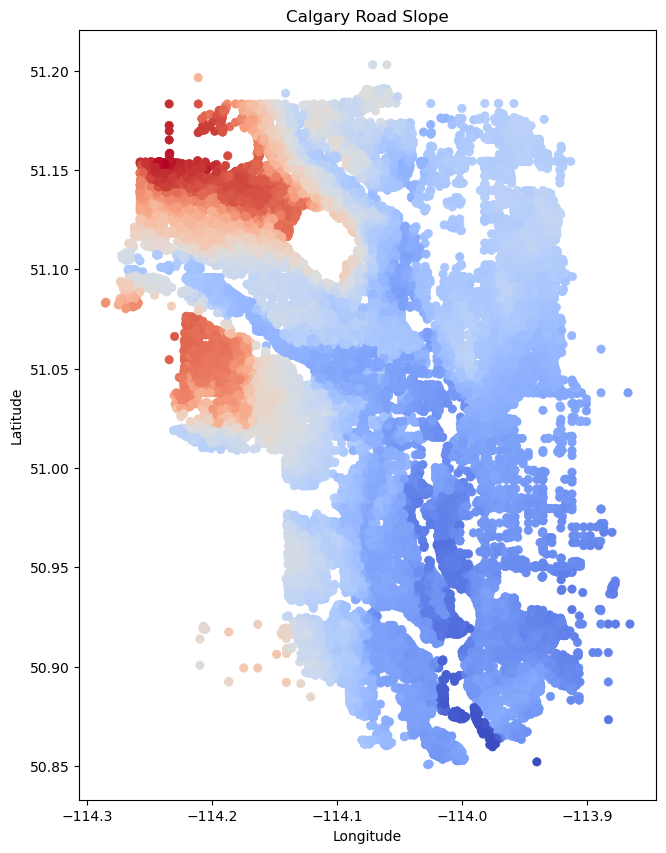

In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the joined data
ax = joined_data.plot(column="elevation", cmap="coolwarm", linewidth=0.5, figsize=(10, 10))

# Set the axis labels and title
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Calgary Road Slope")

# Show the plot
plt.show()


In [22]:
import folium
# Create a folium map object
map_osm = ox.plot_graph_folium(graph, popup_attribute="name", edge_width=2, edge_opacity=0.7)


In [23]:
# Add the joined data to the map as a GeoJson layer
folium.GeoJson(joined_data).add_to(map_osm)
# Show the map
map_osm

In [3]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd

# Define the location as Calgary, Canada
location = "Calgary, Canada"

# Download the street network for the location
graph = ox.graph_from_place(location, network_type="drive", simplify=True)

# Convert the graph to GeoDataFrame with geometry
edges_gdf, nodes_gdf = ox.graph_to_gdfs(graph)

# Set the file path for slope data
file_path = "path/to/gpkg/network.gpkg"

# Read the slope data as a GeoDataFrame
slope_data = gpd.read_file(file_path)

# Perform the spatial join
joined_data = gpd.sjoin(edges_gdf, slope_data, op="intersects")

# Create a plot of the road network
fig, ax = ox.plot_graph(graph, edge_color="#bcbddc", edge_linewidth=1, edge_alpha=0.5, figsize=(12, 12))

# Plot the slope data on top of the road network
joined_data.plot(ax=ax, column="elevation", cmap="coolwarm", linewidth=1)

# Set the plot title and axis labels
ax.set_title("Calgary Road Slope", fontsize=16)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: path/to/gpkg/network.gpkg: No such file or directory

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\Hadia\anaconda3\envs\ox\Lib\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Hadia\AppData\Local\Temp\ipykernel_25136\2950825653.py", line 18, in <module>
    slope_data = gpd.read_file(file_path)
                 ^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Hadia\anaconda3\envs\ox\Lib\site-packages\geopandas\io\file.py", line 259, in _read_file
    return _read_file_fiona(
           ^^^^^^^^^^^^^^^^^
  File "c:\Users\Hadia\anaconda3\envs\ox\Lib\site-packages\geopandas\io\file.py", line 303, in _read_file_fiona
    with rea

### Build Calgary Road Graph and save

In [1]:
import osmnx as ox
import networkx as nx

# Define the location as Calgary, Canada
location = "Calgary, Canada"

# Download the street network for the location
graph = ox.graph_from_place(location, network_type="drive")


### Build Calgary Extreme Weather Graph and save

In [2]:
calgary_slope = ox.io.load_graphml('network.graphml')

In [3]:
# Iterate over the edges in the graph and multiply their length with grade_abs
lenght_dict = nx.get_edge_attributes(calgary_slope, 'length')
grade_abs_dict = nx.get_edge_attributes(calgary_slope, 'grade_abs')

for u, v, key, data in calgary_slope.edges(keys=True, data=True):
    if (u, v) in calgary_slope.edges():
        length = float( lenght_dict[(u, v, key)])
        grade_abs = float(grade_abs_dict[( u, v, key)])
        if grade_abs == 0.000:
            grade_abs = 0.0001
        data['slopized_length'] = length * grade_abs
        calgary_slope.add_edge(u, v, key, **data)

### Build Calgary Gas Emmision Graph and save

In [5]:
import pandas as pd
calgary_trees = pd.read_csv('Public_Trees.csv')

C:\Users\Hadia\AppData\Local\Temp\ipykernel_15800\2841489650.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  calgary_trees = pd.read_csv('Public_Trees.csv')


In [6]:
tree_lats = []
tree_longs = []
for ro in range(len(calgary_trees)):
    coordinates = calgary_trees.loc[ro,'POINT'][6:]
    # extract the latitude and longitude values as strings
    long_str, lat_str = coordinates.strip('()').split()
    tree_lats.append(float(lat_str))
    tree_longs.append(float(long_str))

In [21]:
import osmnx as ox
import geopandas as gpd
import numpy as np

# Create a GeoDataFrame of the trees with their latitudes and longitudes
trees = gpd.GeoDataFrame(geometry=gpd.points_from_xy(tree_lats,tree_longs))

# Find the nearest nodes in the graph for each tree location
tree_nodes = []
tree_edges = []
for ro in range(len(tree_lats)):
    tree_nodes.append(ox.distance.nearest_nodes(calgary_slope, tree_longs[ro], tree_lats[ro], return_dist=False))
    #tree_edges.append(ox.distance.nearest_edges(calgary_slope, tree_longs[ro], tree_lats[ro], return_dist=False))
    if ro %10000 == 0:
        print(ro)


0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000


In [22]:
import pickle
# save the list to a file
with open('./mapGraphs/tree_nodes.pkl', 'wb') as f:
    pickle.dump(tree_nodes, f)

In [23]:
# Create a dictionary that maps each node to the number of trees near it
tree_counts = dict(zip(*np.unique(tree_nodes, return_counts=True)))


In [25]:
# Add the tree count as an attribute to each node in the graph
for node, count in tree_counts.items():
    calgary_slope.nodes[node]['tree_count'] = count

In [26]:
# Iterate through the edges of the graph
for u, v, key, data in calgary_slope.edges(keys=True, data=True):
    
    # Count the total number of trees near the two connected nodes of the edge
    tree_count_u = calgary_slope.nodes[u].get('tree_count', 0)
    tree_count_v = calgary_slope.nodes[v].get('tree_count', 0)
    edge_tree_count = tree_count_u + tree_count_v
    
    # Add the 'edge_tree_count' attribute to the edge
    data['edge_tree_count'] = edge_tree_count
    calgary_slope.add_edge(u, v, key, **data)

In [27]:
nodes_gdf, edges_gdf = ox.graph_to_gdfs(calgary_slope)

In [29]:
# Save the graph as a GraphML file
ox.save_graphml(calgary_slope, filepath='./mapGraphs/calgary_drive_network.graphml')

In [2]:
import pandas as pd
import osmnx as ox
# Load the graph as a pandas DataFrame
calgary_df = ox.graph_to_gdfs(calgary_slope , nodes=False)

# Convert the 'slopized_length' column to float and replace 0 values with 0.005
calgary_df['slopized_length'] = calgary_df['slopized_length'].replace(0, 0.005).astype(float)

# Convert the 'edge_tree_count' column to int and replace 0 values with 1
calgary_df['edge_tree_count'] = calgary_df['edge_tree_count'].replace(0, 1).astype(int)

# Convert the DataFrame back to a graph and save it
calgary_graph = ox.graph_from_gdfs(calgary_df, nodes=False)
ox.io.save_graphml(calgary_graph, './mapGraphs/calgary_drive_network_updated.graphml')

NameError: name 'calgary_slope' is not defined